In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing Dataset

In [246]:
# Train_loan test dataset

In [247]:
data = pd.read_csv('/content/train_loan (1).csv')
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [248]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [249]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now we need to handle all the missing values(nan) in this dataset

In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [251]:
# Since we have 4 categorical columns and 3 numerical columns with null values

In [252]:
# Missing values in 4 Object column and 3 Numerical column

# Numerical columns - mean/median
# Categorical - Mode


In [253]:
# We will plot histograms for all numerical column values

Text(0, 0.5, 'Frequency')

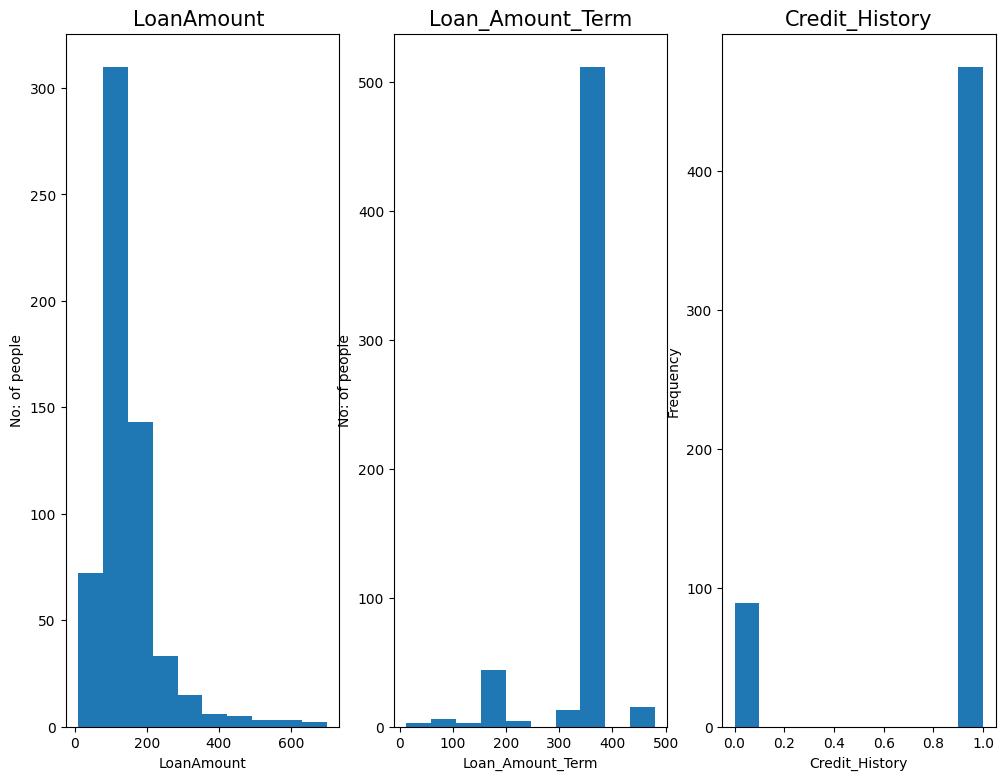

In [254]:
plt.figure(figsize=(12,9))
plt.subplot(1,3,1)
plt.hist(data['LoanAmount'])
plt.title('LoanAmount ', fontsize=15)
plt.xlabel('LoanAmount')
plt.ylabel('No: of people')

plt.subplot(1,3,2)
plt.hist(data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term', fontsize=15)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('No: of people')


plt.subplot(1,3,3)
plt.hist(data['Credit_History'])
plt.title('Credit_History', fontsize=15)
plt.xlabel('Credit_History')
plt.ylabel('Frequency')


In [255]:
# We replace the missing values with either mean/median based on skewness of graph

In [256]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [257]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [258]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [259]:
# Plotting LoanAmount, Loan_Amount_Term, CreditHistory after filling missing values

Text(0, 0.5, 'Frequency')

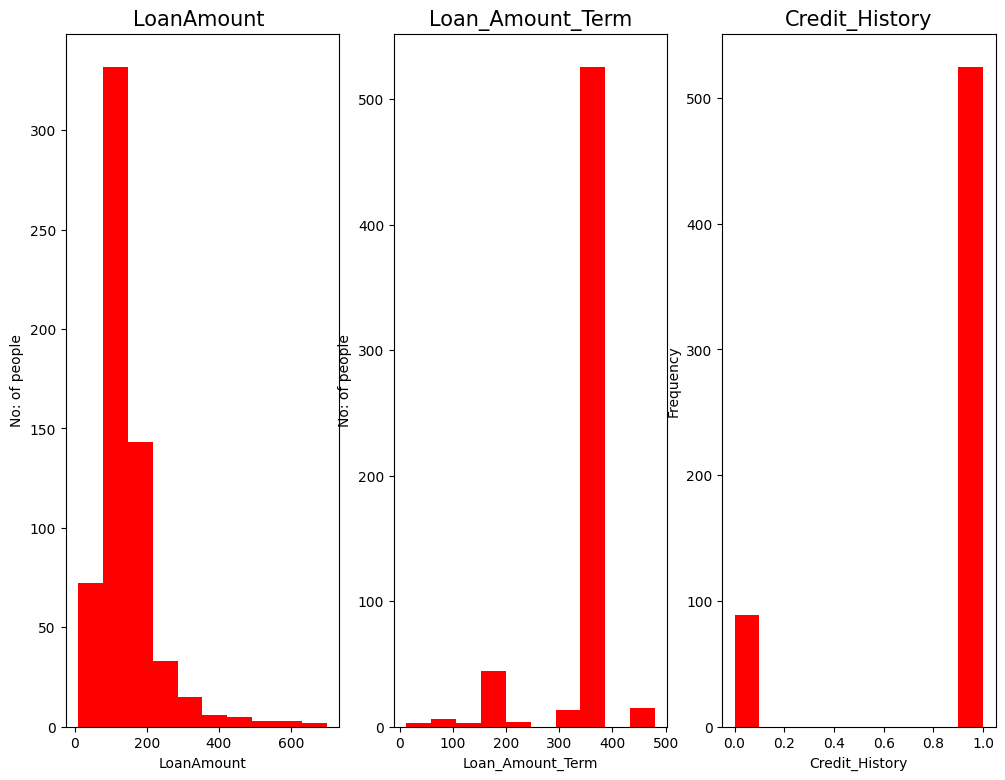

In [260]:
plt.figure(figsize=(12,9))
plt.subplot(1,3,1)
plt.hist(data['LoanAmount'], color='red')
plt.title('LoanAmount ', fontsize=15)
plt.xlabel('LoanAmount')
plt.ylabel('No: of people')

plt.subplot(1,3,2)
plt.hist(data['Loan_Amount_Term'], color='red')
plt.title('Loan_Amount_Term', fontsize=15)
plt.xlabel('Loan_Amount_Term')
plt.ylabel('No: of people')


plt.subplot(1,3,3)
plt.hist(data['Credit_History'], color='red')
plt.title('Credit_History', fontsize=15)
plt.xlabel('Credit_History')
plt.ylabel('Frequency')

In [261]:
# For the categorical/object column we fill missing values with mode

In [262]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [263]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [264]:
data['Gender'] = data['Gender'].fillna('Male')

In [265]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [266]:
x = data['Married'].mode()
x

0    Yes
Name: Married, dtype: object

In [267]:
data['Married'] = data['Married'].fillna(x[0])

In [268]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [269]:
data['Dependents'] = data['Dependents'].str.replace('+',"")
data['Dependents'].median()

<ipython-input-269-8737e631e021>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents'] = data['Dependents'].str.replace('+',"")


0.0

In [270]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].median())

In [271]:
data['Dependents'] = data['Dependents'].astype('int32')

In [272]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode(0)[0])

In [273]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [274]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [275]:
# Now we have filled all msiing values and move onto handling outliers

In [276]:
# Outliers

Text(0.5, 1.0, 'Loan_Amount_Term')

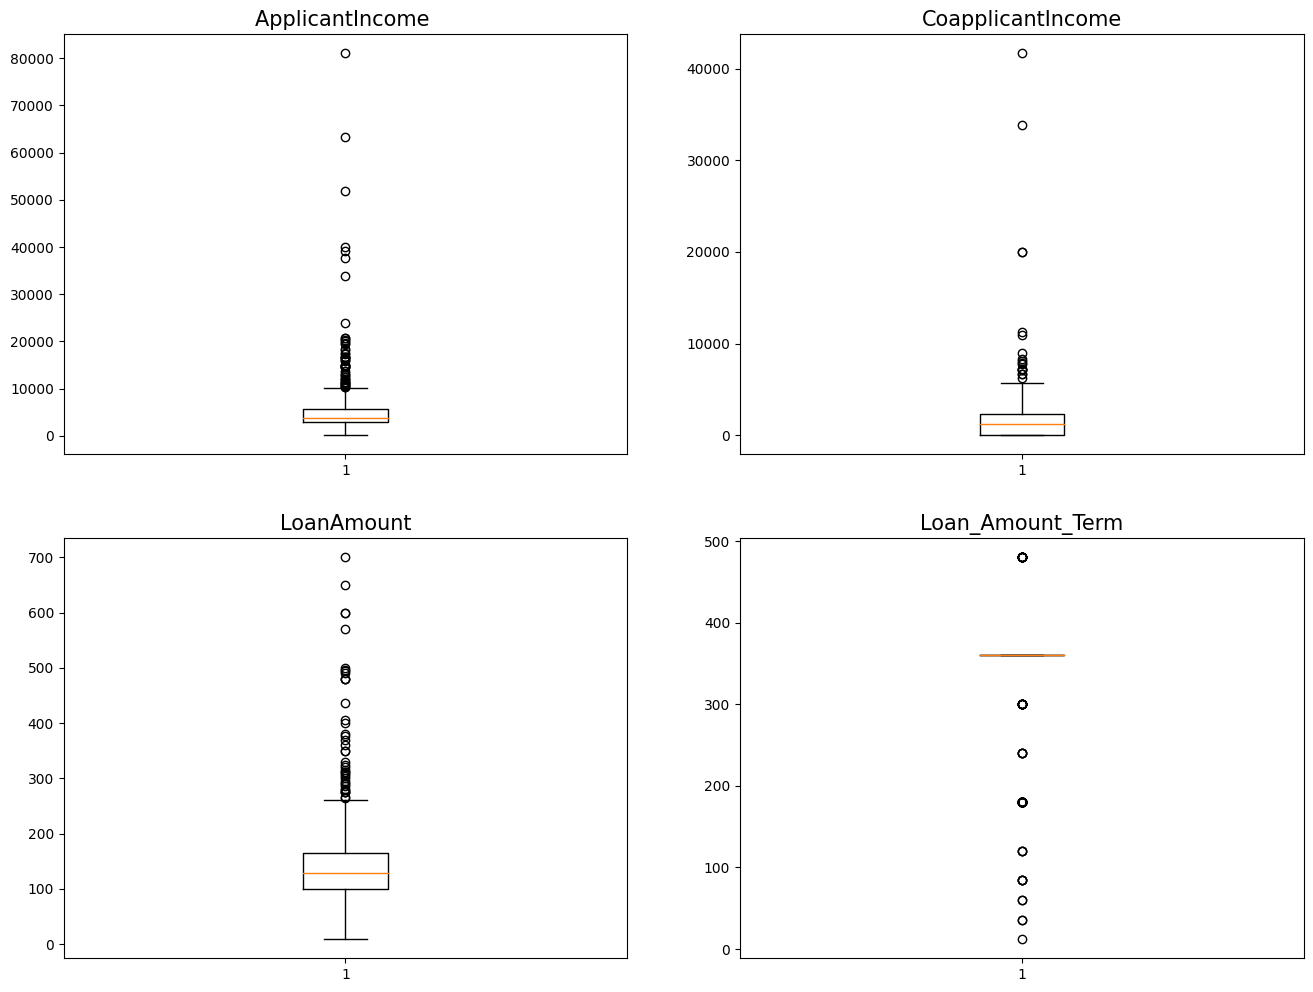

In [277]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.boxplot(data['ApplicantIncome'])
plt.title('ApplicantIncome ', fontsize=15)

plt.subplot(2,2,2)
plt.boxplot(data['CoapplicantIncome'])
plt.title('CoapplicantIncome', fontsize=15)

plt.subplot(2,2,3)
plt.boxplot(data['LoanAmount'])
plt.title('LoanAmount', fontsize=15)

plt.subplot(2,2,4)
plt.boxplot(data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term', fontsize=15)


In [278]:
# Since all 4 columns have outliers, we shall be using IQR method to either floor or cap the values

In [279]:
# ApplicantIncome

In [280]:
Q1 = data['ApplicantIncome'].quantile(0.25)
Q2 = data['ApplicantIncome'].quantile(0.50)
Q3 = data['ApplicantIncome'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-1498.75 10171.25


In [281]:
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] >= high, high, np.where(data['ApplicantIncome'] <= low, low, data['ApplicantIncome']))

In [282]:
# CoapplicantIncome

In [283]:
Q1 = data['CoapplicantIncome'].quantile(0.25)
Q2 = data['CoapplicantIncome'].quantile(0.50)
Q3 = data['CoapplicantIncome'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

-3445.875 5743.125


In [284]:
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] >= high, high, np.where(data['CoapplicantIncome'] <= low, low, data['CoapplicantIncome']))

In [285]:
# LoanAmount

In [286]:
Q1 = data['LoanAmount'].quantile(0.25)
Q2 = data['LoanAmount'].quantile(0.50)
Q3 = data['LoanAmount'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

3.5 261.5


In [287]:
data['LoanAmount'] = np.where(data['LoanAmount'] >= high, high, np.where(data['LoanAmount'] <= low, low, data['LoanAmount']))

In [288]:
# Loan_Amount_Term

In [289]:
Q1 = data['Loan_Amount_Term'].quantile(0.25)
Q2 = data['Loan_Amount_Term'].quantile(0.50)
Q3 = data['Loan_Amount_Term'].quantile(0.75)

IQR = Q3-Q1
low = Q1 - (1.5*IQR)
high = Q3 + (1.5*IQR)
print(low,high)

360.0 360.0


In [290]:
data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'] >= high, high, np.where(data['Loan_Amount_Term'] <= low, low, data['Loan_Amount_Term']))

In [291]:
# Plotting the dataset after removal of outliers

Text(0.5, 1.0, 'Loan_Amount_Term')

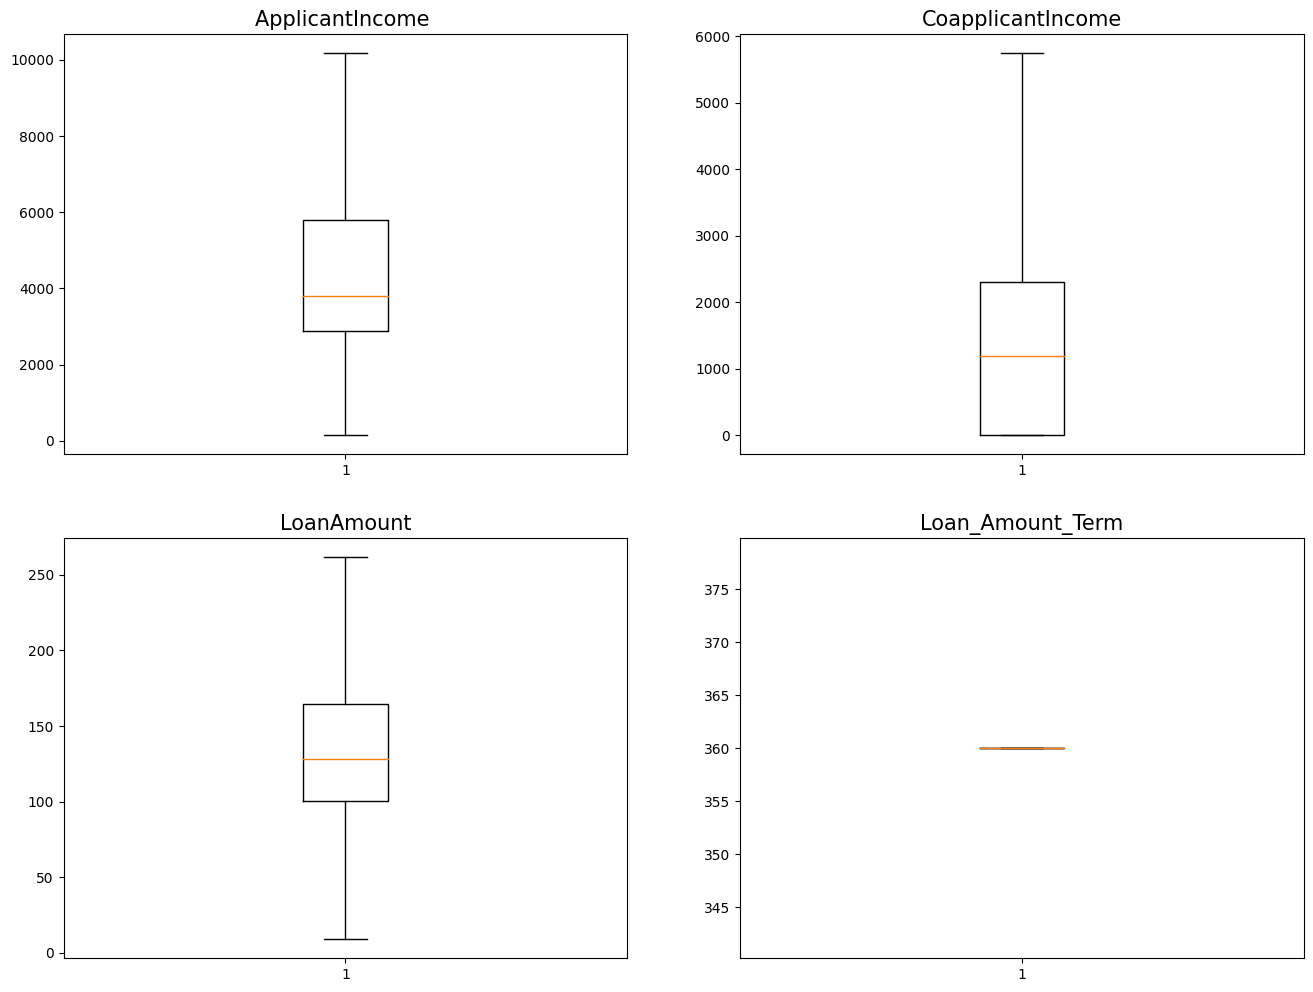

In [292]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
plt.boxplot(data['ApplicantIncome'])
plt.title('ApplicantIncome ', fontsize=15)

plt.subplot(2,2,2)
plt.boxplot(data['CoapplicantIncome'])
plt.title('CoapplicantIncome', fontsize=15)

plt.subplot(2,2,3)
plt.boxplot(data['LoanAmount'])
plt.title('LoanAmount', fontsize=15)

plt.subplot(2,2,4)
plt.boxplot(data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term', fontsize=15)

In [293]:
# Encoding
# Label Encoding for the target column i.e Loan_Status

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [294]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [295]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int32
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [296]:
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Loan_Status'].unique()

array([1, 0])

In [297]:
# one hot encoding
# First we drop Loan_ID column as it has no use in encoding

In [298]:
y = data['Loan_ID']
data = pd.get_dummies(data.drop('Loan_ID', axis=1))
data['Loan_ID'] = y

In [299]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID
0,0,5849.0,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1,LP001002
1,1,4583.0,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0,LP001003
2,0,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1,LP001005
3,0,2583.0,2358.0,120.0,360.0,1.0,1,0,1,0,1,0,1,1,0,0,0,1,LP001006
4,0,6000.0,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1,LP001008


In [300]:
# Scaling

# We do not do feature scaling for target column, this is especially dangerous in the case of regression models where the target column if scaled leads to incorrect information to model
# Feature scaling only in independent features and non-target columns

In [301]:
x = data.copy()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [302]:
# We split the data into x and y where x stands for the feature variables and y stands for target variable

In [303]:
x = data[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term']] #Features
y = data['Loan_Status'] # Target

x.loc[:,['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term' ]] = sc.fit_transform(x[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term']])

<ipython-input-303-c5c0124441e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:,['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term' ]] = sc.fit_transform(x[['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',	'Loan_Amount_Term']])


In [304]:
x.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,-0.737806,0.497164,-0.874587,-0.168041,0.0
1,0.253470,-0.013767,0.054395,-0.168041,0.0
2,-0.737806,-0.652632,-0.874587,-1.280462,0.0
3,-0.737806,-0.820924,0.578025,-0.311579,0.0
4,-0.737806,0.558104,-0.874587,0.065209,0.0
5,1.244745,0.322818,1.710299,2.227252,0.0
6,-0.737806,-0.921819,0.059323,-0.760136,0.0
7,2.236021,-0.638103,0.667966,0.370227,0.0
8,1.244745,-0.246632,0.065483,0.549650,0.0
9,0.253470,2.241532,2.663383,2.227252,0.0


In [305]:
# Splitting data as training and testing data
# 75% of dataset is used for training the data while 25% data is used for testing the model

In [306]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=42)
x_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
92,1.244745,-0.542455,0.246598,-1.011327,0.0
304,-0.737806,-0.249053,0.665502,0.047266,0.0
68,2.236021,1.002041,-0.874587,-0.221868,0.0
15,-0.737806,0.134347,-0.874587,-0.221868,0.0
211,2.236021,-0.479093,-0.104543,-0.168041,0.0
...,...,...,...,...,...
71,1.244745,-1.106658,0.280480,-0.724251,0.0
106,1.244745,2.241532,-0.180931,1.572359,0.0
270,-0.737806,-0.556984,-0.874587,-1.926383,0.0
435,-0.737806,2.191387,-0.874587,-0.168041,0.0


In [307]:
y_train

92     1
304    1
68     1
15     1
211    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 460, dtype: int64

In [308]:
# Ensemble Learning techniques:


In [309]:
# Random Forest Algorithm
# Importing the tree classifier for plotting decision tree

In [310]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [311]:
# Viewing Accuracy, Precision, Confusion Matrix to get an idea on how model performs

In [312]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
accuracy_score(y_test,y_pred)   # Accuracy Score

0.5974025974025974

In [313]:
confusion_matrix(y_test,y_pred) # Confusion Matrix

array([[20, 34],
       [28, 72]])

In [314]:
precision_score(y_test, y_pred) # Precision Score

0.6792452830188679

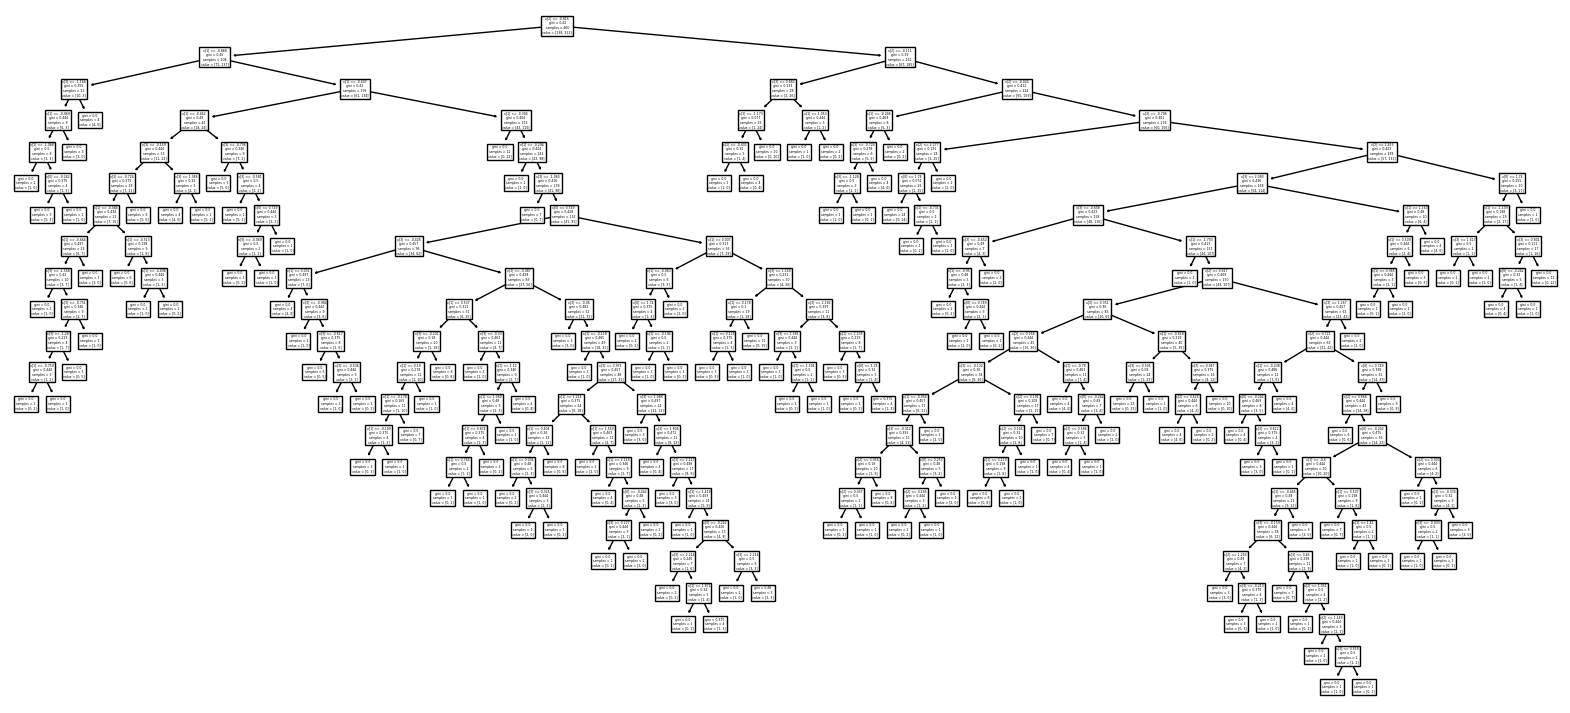

In [315]:
from sklearn import tree  # we plot Multiple Decision Trees and use random forest algorithm to compare and select the best one
plt.figure(figsize=(20,9))
tree.plot_tree(clf)
plt.show()

In [316]:
# Now we call Random Forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [317]:
accuracy_score(y_test,y_pred)   # Accuracy Score

0.6233766233766234

In [318]:
# Boosting

# Adaboost

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [319]:
print('Accuracy Score: ', accuracy_score(y_test,y_pred)) # Accuracy Score

Accuracy Score:  0.577922077922078


In [320]:
# Bagging Classifier

In [321]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [322]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.564935064935065


In [323]:
from sklearn.ensemble import BaggingClassifier # Importing Bagging Classifier

In [324]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier()
bagging_clf.fit(x_train, y_train)

BaggingClassifier()

In [325]:
y_pred  =bagging_clf.predict(x_test)

In [326]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.5974025974025974


In [327]:
# Next Bagging type is with State Vector Machine model
# Bagging with SVM


from sklearn.svm import SVC
bagging_clf2 = BaggingClassifier(base_estimator = SVC(), n_estimators = 100, random_state=42)

In [328]:
bagging_clf2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=42)

In [329]:
y_pred2 = bagging_clf2.predict(x_test)

In [330]:
print('Accuracy: ', accuracy_score(y_test,y_pred2))

Accuracy:  0.6493506493506493


In [331]:
# Boosting is yet another type of Ensemble Learning Technique
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [332]:
y_pred3 = ada_boost_clf.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred3))

Accuracy:  0.577922077922078


In [333]:
# Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100)
grad_boost_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [334]:
y_pred3 = grad_boost_clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test,y_pred3))

Accuracy:  0.6103896103896104


In [335]:
# XGBoost Method


import xgboost as xgb

xg_boost_clf = xgb.XGBClassifier()
xg_boost_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [336]:
y_pred4 = xg_boost_clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test,y_pred4))

Accuracy:  0.6038961038961039


In [336]:
# We have seen various Ensemble Learning Techniques used on the dataset
# Out of all the algorithms used we see that Bagging with SVM is the most appropriate model with highest level of acuuracy